In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import PIL

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (44).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (30).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (47).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (72).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (74).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (54).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (63).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (77).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (40).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (48).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (78).jpg
/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (75).jpg
/kaggle/input/wallpapers/wal

In [2]:
parent_dir="/kaggle/working/"
rgb_dir="rgb_images"
bw_dir="bw_images"

In [3]:
for d in [bw_dir,rgb_dir]:
    path=os.path.join(parent_dir,d)
    os.mkdir(path)

## any size to 100x100 image

In [4]:
from PIL import Image

In [5]:
image_array=np.array(Image.open("/kaggle/input/wallpapers/wallpapers images/wallpaperflare.com_wallpaper (10).jpg"))

In [6]:
Image.fromarray(image_array).save("/kaggle/working/image.png")

In [7]:
image_array[:,:,2]

array([[109, 109, 109, ..., 181, 181, 181],
       [109, 109, 109, ..., 180, 180, 180],
       [109, 109, 109, ..., 180, 180, 180],
       ...,
       [ 53,  53,  53, ...,  41,  41,  41],
       [ 53,  53,  53, ...,  41,  41,  41],
       [ 53,  53,  53, ...,  41,  41,  41]], dtype=uint8)

In [8]:
iterator=iter(range(10**5))

In [9]:
def to_100x100_image(image_path,des_path):
    parent_image=np.array(Image.open(image_path))
    num_images_inlines=parent_image.shape[0]//100
    num_images_incols=parent_image.shape[1]//100
    for i in range(num_images_inlines):
        for j in range(num_images_incols):
            image_array=parent_image[i*100:(i+1)*100,j*100:(j+1)*100,:]
            image=Image.fromarray(image_array)
            image.save(des_path+"image"+str(next(iterator))+".png")

In [10]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        image_path=os.path.join(dirname, filename)
        to_100x100_image(image_path,"/kaggle/working/rgb_images/")

In [11]:
len(os.listdir("/kaggle/working/rgb_images"))

51289

## rgb to bw

In [12]:
def rgb2bw(img_arr):
    red=img_arr[:,:,0]
    green=img_arr[:,:,1]
    blue=img_arr[:,:,2]
    bw_array=0.299*red+0.587*green+0.114*blue
    return bw_array.astype('uint8')

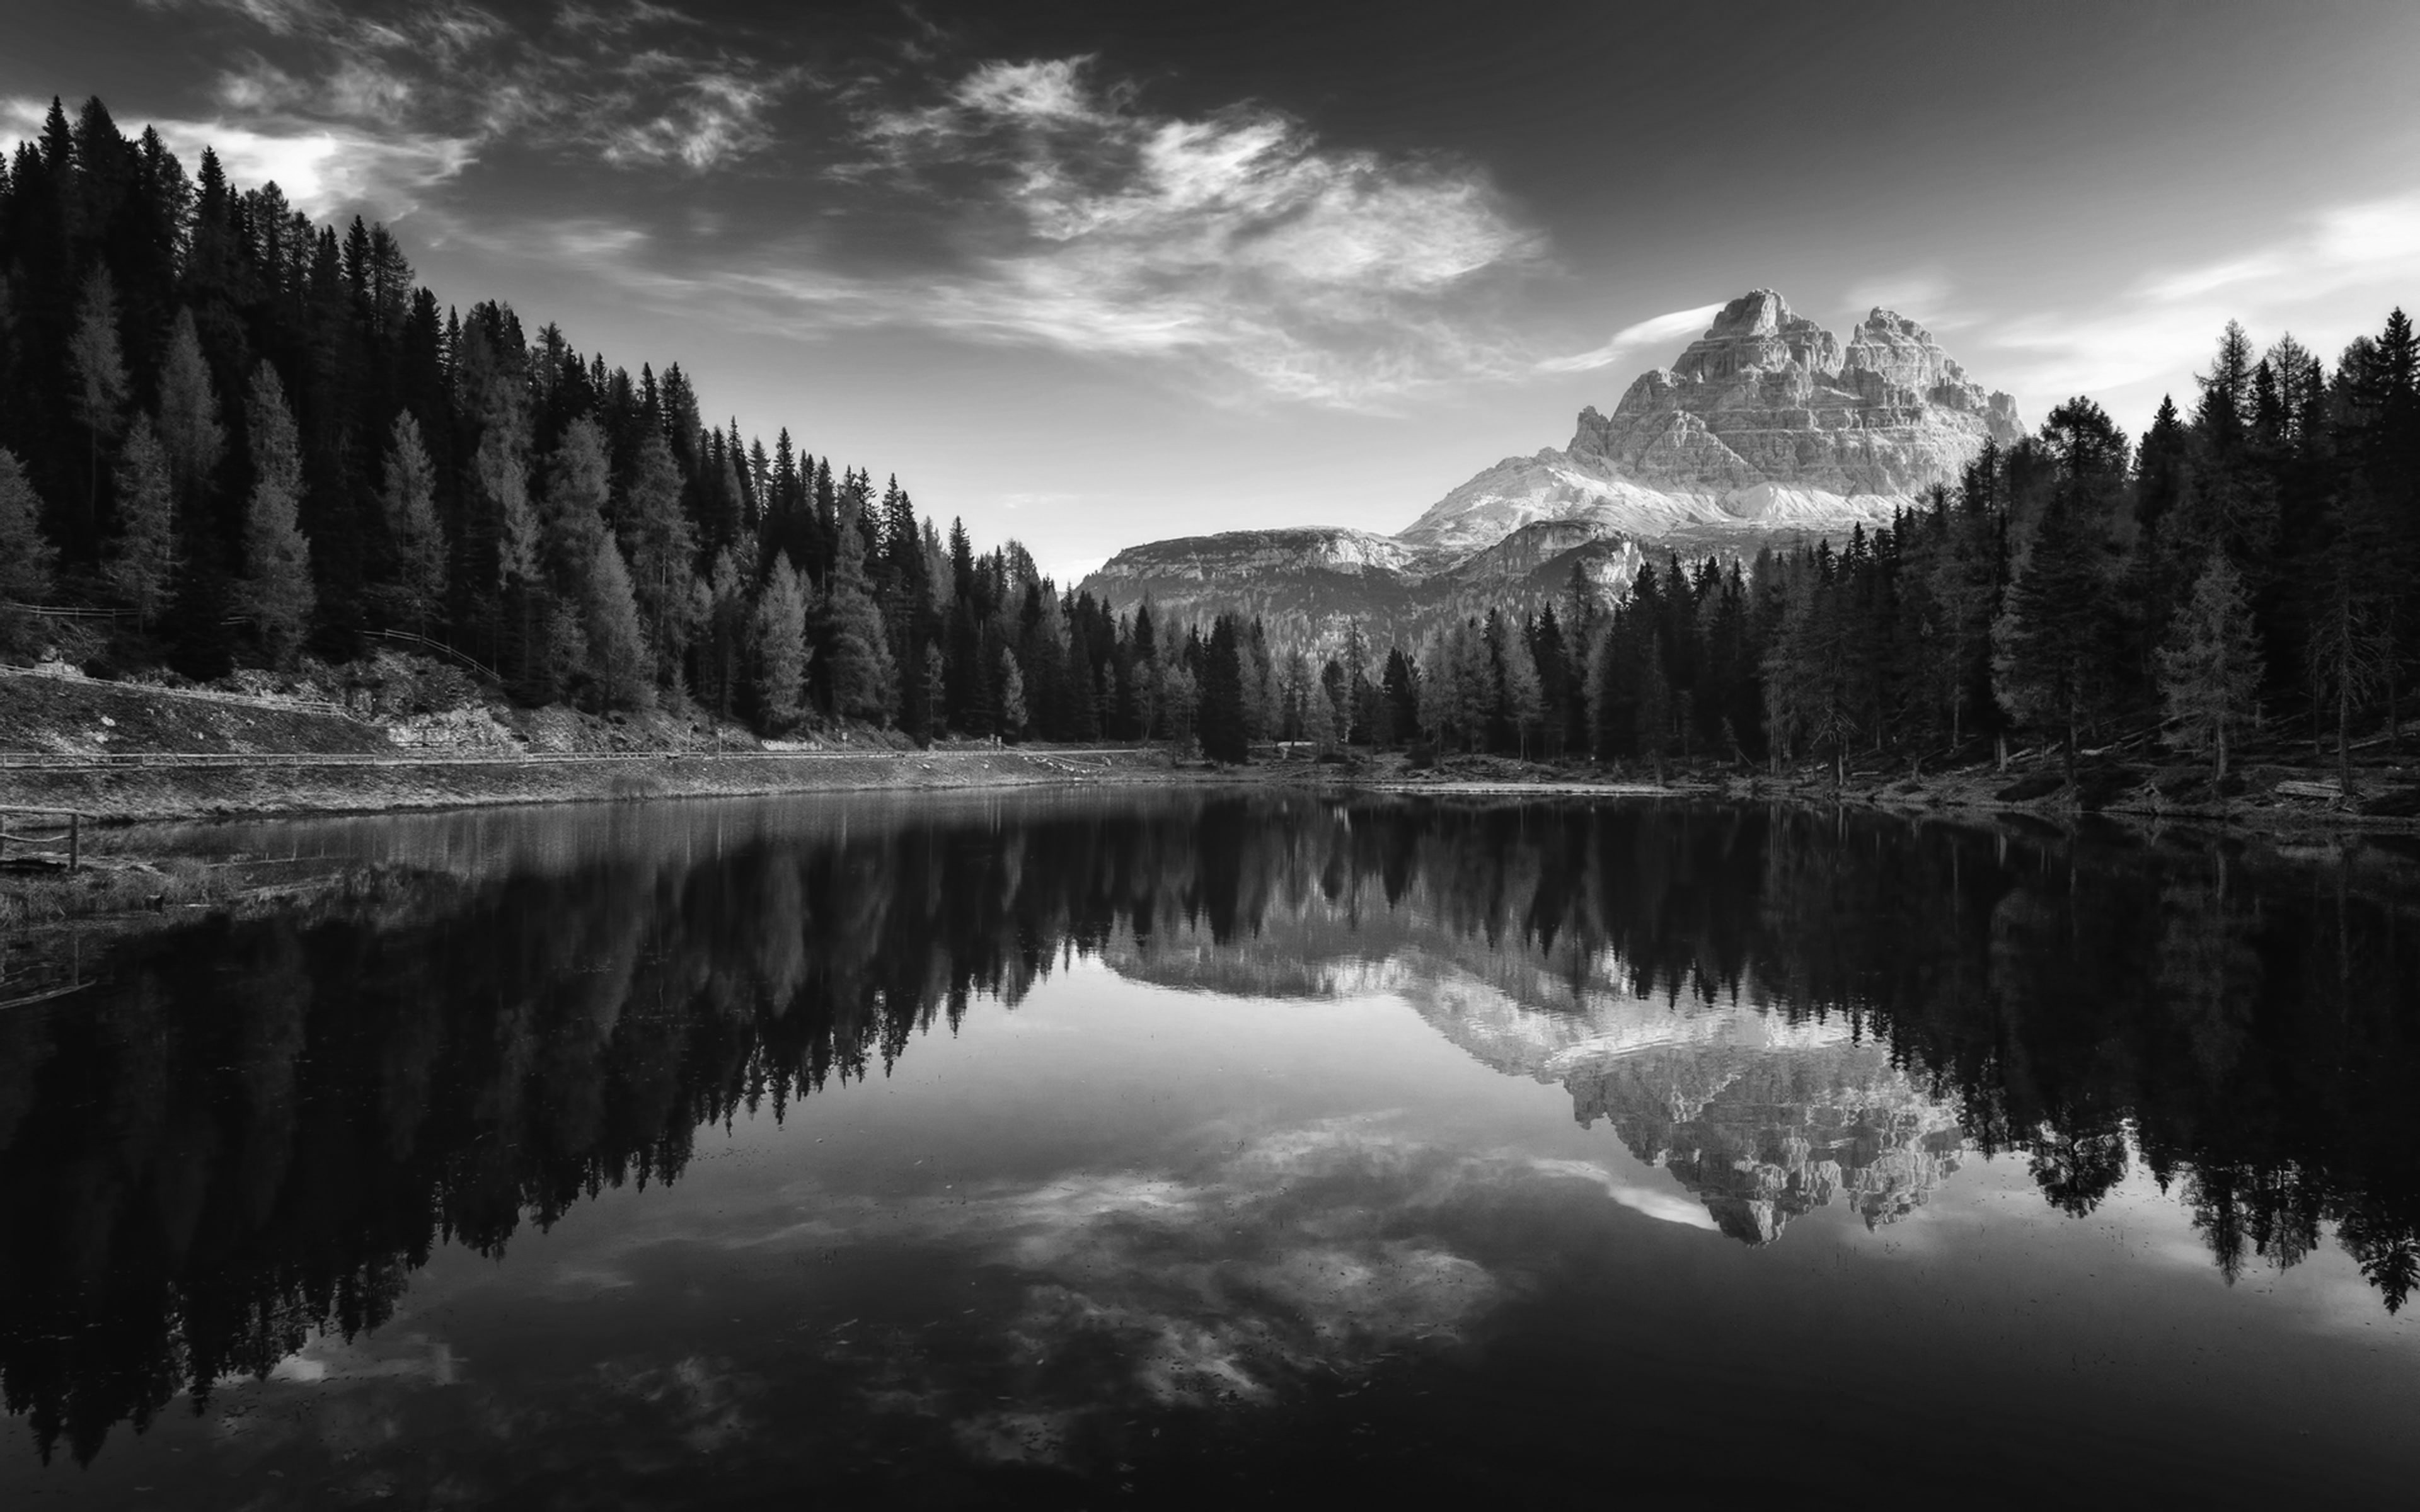

In [13]:
Image.fromarray(rgb2bw(image_array))

In [14]:
for filename in os.listdir("/kaggle/working/rgb_images"):
    path=os.path.join("/kaggle/working/rgb_images",filename)
    image_array=np.array(Image.open(path))
    bw_img=Image.fromarray(rgb2bw(image_array))
    new_path=os.path.join("/kaggle/working/bw_images",filename)
    bw_img.save(new_path)